<a href="https://colab.research.google.com/github/SantiagoGomezfpv/hyperparameter/blob/main/Normalizado_CargarPickles_perRow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Base para pruebas RZ

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/JOVEN INVESTIGADOR/Data'

/content/drive/MyDrive/JOVEN INVESTIGADOR/Data


In [ ]:
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("DEVICE:", DEVICE)

DEVICE: cpu


In [ ]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split

## Índices Acústicos

Generados con scikit-maad, basado en https://scikit-maad.github.io/_auto_examples/2_advanced/plot_extract_alpha_indices.html#sphx-glr-auto-examples-2-advanced-plot-extract-alpha-indices-py

In [ ]:
with open('./ais_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_ai = unserialized_data['X']
    y_ai = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [ ]:
sum(sum(np.isnan(X_ai)))

481

In [ ]:
X_ai[np.isnan(X_ai)] = 0

In [ ]:
sum(sum(np.isnan(X_ai)))

0

In [ ]:
print(f'Tamaño matriz de características: {X_ai.shape}')
print(f'Tamaño vector de etiquetas: {y_ai.shape}')

Tamaño matriz de características: (71497, 60)
Tamaño vector de etiquetas: (71497, 1)


## VGGish

S. Hershey et al., ‘CNN Architectures for Large-Scale Audio Classification’,\ in International Conference on Acoustics, Speech and Signal Processing (ICASSP),2017\ Available: https://arxiv.org/abs/1609.09430, https://ai.google/research/pubs/pub45611

Modelo preentrenado usado: https://github.com/harritaylor/torchvggish

In [ ]:
with open('./vgg_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_vgg = unserialized_data['X']
    y_vgg = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [ ]:
print(f'Tamaño matriz de características: {X_vgg.shape}')
print(f'Tamaño vector de etiquetas: {y_vgg.shape}')

Tamaño matriz de características: (71497, 128)
Tamaño vector de etiquetas: (71497, 1)


## YAMNet

https://www.diva-portal.org/smash/get/diva2:1605037/FULLTEXT01.pdf

Modelo preentrenado usado: https://tfhub.dev/google/yamnet/1

In [ ]:
with open('./yamn_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_yamn = unserialized_data['X']
    y_yamn = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [ ]:
print(f'Tamaño matriz de características: {X_yamn.shape}')
print(f'Tamaño vector de etiquetas: {y_yamn.shape}')

Tamaño matriz de características: (71497, 1024)
Tamaño vector de etiquetas: (71497, 1)


## PANNs

Kong, Qiuqiang, Yin Cao, Turab Iqbal, Yuxuan Wang, Wenwu Wang, and Mark D. Plumbley. "PANNs: Large-Scale Pretrained Audio Neural Networks for Audio Pattern Recognition." arXiv preprint arXiv:1912.10211 (2019).

Modelo preentrenado usado https://github.com/qiuqiangkong/panns_inference

In [ ]:
with open('./panns_perRow.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)
    X_panns = unserialized_data['X']
    y_panns = unserialized_data['y']
    print('Datos Cargados!')

Datos Cargados!


In [ ]:
print(f'Tamaño matriz de características: {X_panns.shape}')
print(f'Tamaño vector de etiquetas: {y_panns.shape}')

Tamaño matriz de características: (71497, 2048)
Tamaño vector de etiquetas: (71497, 1)


In [ ]:
print(np.unique(y_vgg, return_counts=True)) # Las etiquetas son 0, 1 y 2. Hacen referencia a lo siguiente:
NumtoCover = {0: 'Pastizal', 1:'Sabana', 2:'Bosque'}


(array([0., 1., 2.]), array([41957, 14994, 14546]))


## Celda para división de datos en Entrenamiento/Validación/Prueba (Train/val/test)

La siguiente celda se hace con la intención de dividir el conjunto de índices acústicos (_ai) en conjuntos de entrenamiento, validación y prueba con una proporción 80%/10%/10%.

Adicionalmente se almacenan los índices con los que se realizó la división, esto con el fin de realizar exactamente la misma separación con las características VGGish, PANNs y YAMNet. Lo anterior para garantizar que se están trabajando con las mismas grabaciones sin importar la caracterización.

Las etiquetas son las mismas para todos los conjuntos de datos.

In [ ]:

n_samples = X_ai.shape[0]
indices = np.arange(n_samples)

X_ai_train, X_ai_test, y_train, y_test, idx_train, idx_test = train_test_split(X_ai, y_ai, indices, test_size=0.2)
X_ai_val, X_ai_test, y_val, y_test, idx_val, idx_test = train_test_split(X_ai_test, y_test, idx_test, test_size=0.5)

In [ ]:
print(X_ai_train.shape)
print(X_ai_val.shape)
print(X_ai_test.shape)

(57197, 60)
(7150, 60)
(7150, 60)


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
print(y_ai.shape)

(57197, 1)
(7150, 1)
(7150, 1)
(71497, 1)


### VGGish

In [ ]:
X_vgg_train = X_vgg[idx_train]
X_vgg_val = X_vgg[idx_val]
X_vgg_test = X_vgg[idx_test]

In [ ]:
print(X_vgg_train.shape)
print(X_vgg_val.shape)
print(X_vgg_test.shape)

(57197, 128)
(7150, 128)
(7150, 128)


### YAMNet

In [ ]:
X_yamn_train = X_yamn[idx_train]
X_yamn_val = X_yamn[idx_val]
X_yamn_test = X_yamn[idx_test]

In [ ]:
print(X_yamn_train.shape)
print(X_yamn_val.shape)
print(X_yamn_test.shape)

(57197, 1024)
(7150, 1024)
(7150, 1024)


### PANNs

In [ ]:
  X_panns_train = X_panns[idx_train]
  X_panns_val = X_panns[idx_val]
  X_panns_test = X_panns[idx_test]

In [ ]:
print(X_panns_train.shape)
print(X_panns_val.shape)
print(X_panns_test.shape)

(57197, 2048)
(7150, 2048)
(7150, 2048)


# Técnicas tradicionales clasificadores

In [ ]:
!pip install optuna scikit-learn xgboost matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.svm import SVC

# Asegúrate de que y_train, y_val y y_test sean vectores 1D
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

## Indices acústicos (_ai)


*   X_ai_train
*   X_ai_val
*   X_ai_test






In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_Xai= scaler.fit_transform(X_ai_train)

# Ajustar y transformar x_test y x_val
scaled_x_test = scaler.transform(X_ai_test)
scaled_x_val = scaler.transform(X_ai_val)

### Random Forest + Optuna

[I 2024-06-26 16:22:21,228] A new study created in memory with name: no-name-2b2732c9-d01f-4655-a30e-6fbf8c0506f8
[I 2024-06-26 16:23:45,327] Trial 0 finished with value: 0.7962237762237763 and parameters: {'n_estimators': 136, 'max_depth': 26, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7962237762237763.
[I 2024-06-26 16:24:22,183] Trial 1 finished with value: 0.6181818181818182 and parameters: {'n_estimators': 181, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7962237762237763.
[I 2024-06-26 16:24:29,363] Trial 2 finished with value: 0.64 and parameters: {'n_estimators': 23, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7962237762237763.
[I 2024-06-26 16:26:30,313] Trial 3 finished with value: 0.8004195804195804 and parameters: {'n_estimators': 192, 'max_depth': 32, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.8004195804195

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      4149
         1.0       0.79      0.59      0.68      1492
         2.0       0.77      0.61      0.68      1509

    accuracy                           0.81      7150
   macro avg       0.80      0.72      0.75      7150
weighted avg       0.80      0.81      0.80      7150



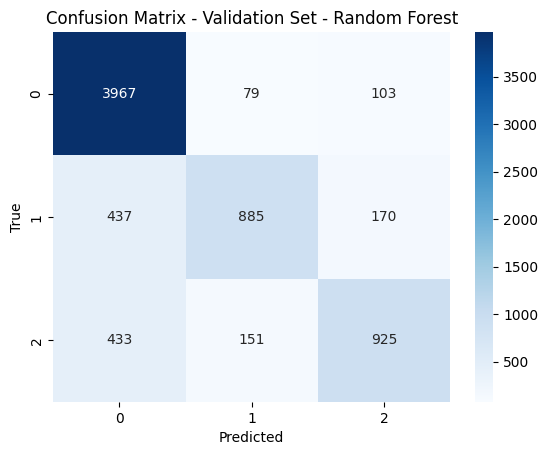

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4137
         1.0       0.80      0.59      0.68      1526
         2.0       0.77      0.61      0.68      1487

    accuracy                           0.81      7150
   macro avg       0.79      0.72      0.75      7150
weighted avg       0.80      0.81      0.80      7150



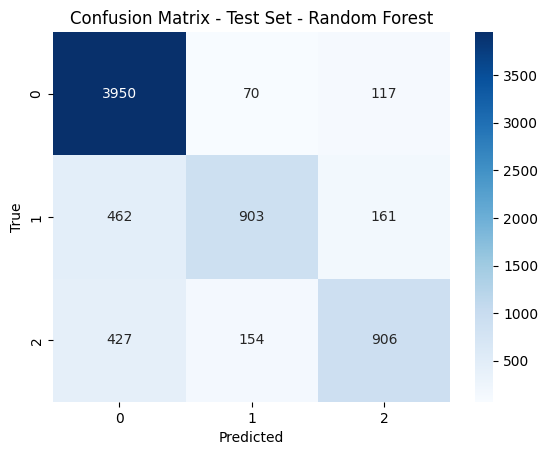

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(scaled_Xai, y_train)
    y_pred = rf.predict(scaled_x_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(scaled_Xai, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(scaled_x_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(scaled_x_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 106, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-26 17:18:26,753] A new study created in memory with name: no-name-c28fd103-f2d0-40a3-84ca-be80ae5f0d19
[I 2024-06-26 17:18:30,011] Trial 0 finished with value: 0.7205594405594405 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.7205594405594405.
[I 2024-06-26 17:18:33,183] Trial 1 finished with value: 0.734965034965035 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.734965034965035.
[I 2024-06-26 17:18:38,535] Trial 2 finished with value: 0.7061538461538461 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.734965034965035.
[I 2024-06-26 17:18:42,032] Trial 3 finished with value: 0.7102097902097902 and parameters: {'n_neighbors': 26, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 1 with value: 0.734965034965035.
[I 2024-06-26 17:19:17,244] Trial 4 finished with value: 0.733566

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      4149
         1.0       0.65      0.58      0.62      1492
         2.0       0.69      0.57      0.62      1509

    accuracy                           0.77      7150
   macro avg       0.72      0.69      0.70      7150
weighted avg       0.76      0.77      0.76      7150



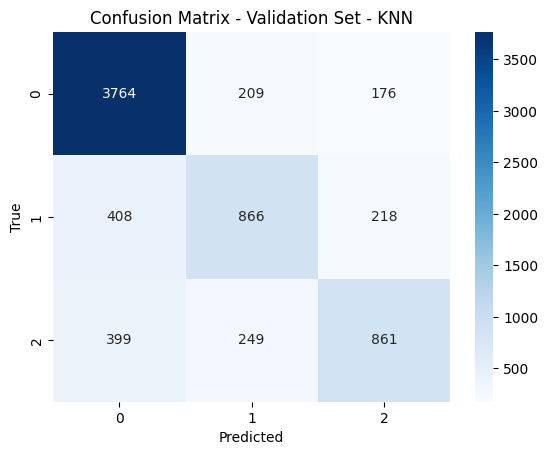

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      4137
         1.0       0.65      0.57      0.61      1526
         2.0       0.66      0.54      0.59      1487

    accuracy                           0.76      7150
   macro avg       0.71      0.67      0.69      7150
weighted avg       0.75      0.76      0.75      7150



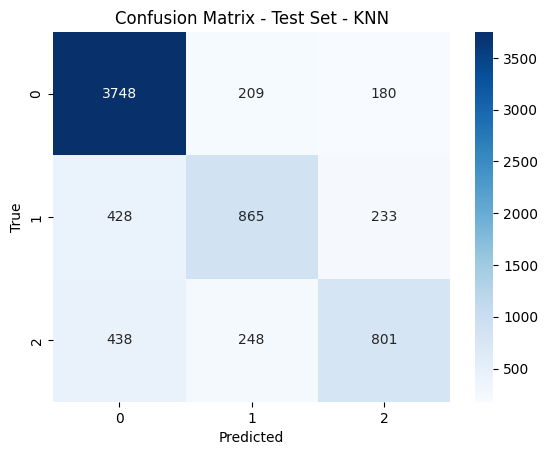

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(scaled_Xai, y_train)
    y_pred = knn.predict(scaled_x_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(scaled_Xai, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(scaled_x_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(scaled_x_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(scaled_Xai, y_train)
    y_pred = svm.predict(scaled_x_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(scaled_Xai, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(scaled_x_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(scaled_x_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-26 20:28:12,006] A new study created in memory with name: no-name-2114059a-f0c0-41c1-96af-5dde7eaa5389
[W 2024-06-26 20:36:08,017] Trial 0 failed with parameters: {'C': 2055.0866587272185, 'kernel': 'sigmoid'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-41-80737b17dc10>", line 11, in objective_svm
    svm.fit(scaled_Xai, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 252, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 331, in _dense_fit
    ) = libsvm.fit(
KeyboardInterrupt
[W 2024-06-26 20:36:08,022] Trial 0 failed with value None.


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

[I 2024-06-26 17:53:03,945] A new study created in memory with name: no-name-1a70875f-de6f-4f95-afaa-e7c2c1f381c8
[I 2024-06-26 17:55:10,574] Trial 0 finished with value: 0.8573426573426574 and parameters: {'n_estimators': 80, 'learning_rate': 0.10553166704175623, 'max_depth': 15, 'subsample': 0.703649727613138, 'colsample_bytree': 0.9384130560069768}. Best is trial 0 with value: 0.8573426573426574.
[I 2024-06-26 17:55:38,157] Trial 1 finished with value: 0.847972027972028 and parameters: {'n_estimators': 96, 'learning_rate': 0.1746112555945693, 'max_depth': 8, 'subsample': 0.9173676395640782, 'colsample_bytree': 0.9888062861213751}. Best is trial 0 with value: 0.8573426573426574.
[I 2024-06-26 17:59:55,760] Trial 3 finished with value: 0.8499300699300699 and parameters: {'n_estimators': 34, 'learning_rate': 0.17988972141194082, 'max_depth': 17, 'subsample': 0.9959042921916943, 'colsample_bytree': 0.8794423043709032}. Best is trial 2 with value: 0.8579020979020979.
[I 2024-06-26 18:02:

Validation Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      4149
         1.0       0.85      0.74      0.80      1492
         2.0       0.84      0.76      0.80      1509

    accuracy                           0.87      7150
   macro avg       0.86      0.82      0.84      7150
weighted avg       0.87      0.87      0.87      7150



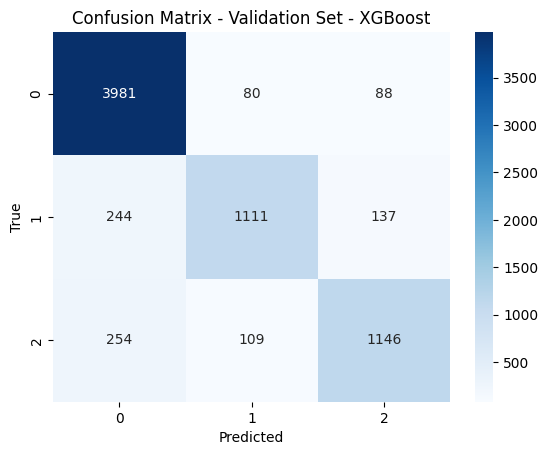

Test Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      4137
         1.0       0.85      0.73      0.78      1526
         2.0       0.82      0.75      0.78      1487

    accuracy                           0.86      7150
   macro avg       0.85      0.81      0.83      7150
weighted avg       0.86      0.86      0.86      7150



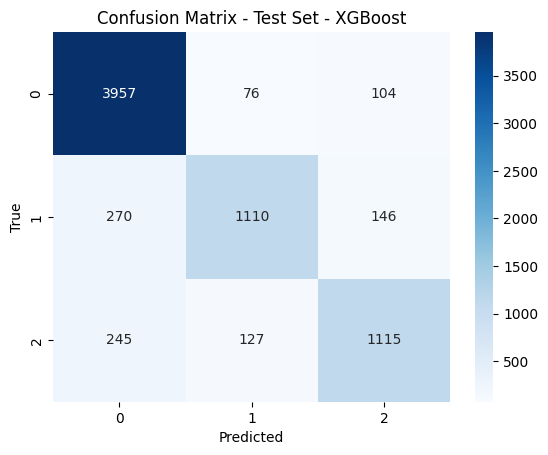

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(scaled_Xai, y_train)
    y_pred = xgb_clf.predict(scaled_x_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(scaled_Xai, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(scaled_x_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(scaled_x_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

{'n_estimators': 198, 'learning_rate': 0.1999391143618954, 'max_depth': 29, 'subsample': 0.7307950104382233, 'colsample_bytree': 0.9237476344952306}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## VGGish



*   X_vgg_train
*   X_vgg_val
*   X_vgg_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_vgg_train= scaler.fit_transform(X_vgg_train)

# Ajustar y transformar x_test y x_val
scaled_X_vgg_test = scaler.transform(X_vgg_test)
scaled_X_vgg_val = scaler.transform(X_vgg_val)

### Random Forest + Optuna

[I 2024-06-26 22:32:31,297] A new study created in memory with name: no-name-18010f4a-df9b-4423-9511-53808aea8f21
[I 2024-06-26 22:32:53,732] Trial 0 finished with value: 0.7783216783216783 and parameters: {'n_estimators': 26, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7783216783216783.
[I 2024-06-26 22:33:47,381] Trial 1 finished with value: 0.7373426573426574 and parameters: {'n_estimators': 80, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7783216783216783.
[I 2024-06-26 22:34:40,342] Trial 2 finished with value: 0.7970629370629371 and parameters: {'n_estimators': 54, 'max_depth': 28, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.7970629370629371.
[I 2024-06-26 22:35:37,879] Trial 3 finished with value: 0.7688111888111888 and parameters: {'n_estimators': 74, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4202
         1.0       0.76      0.56      0.65      1480
         2.0       0.72      0.64      0.67      1468

    accuracy                           0.80      7150
   macro avg       0.77      0.71      0.74      7150
weighted avg       0.80      0.80      0.79      7150



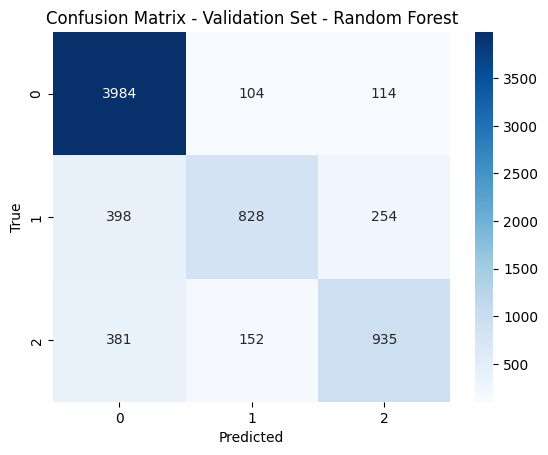

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.89      4214
         1.0       0.75      0.56      0.64      1464
         2.0       0.73      0.63      0.67      1472

    accuracy                           0.80      7150
   macro avg       0.77      0.71      0.73      7150
weighted avg       0.79      0.80      0.79      7150



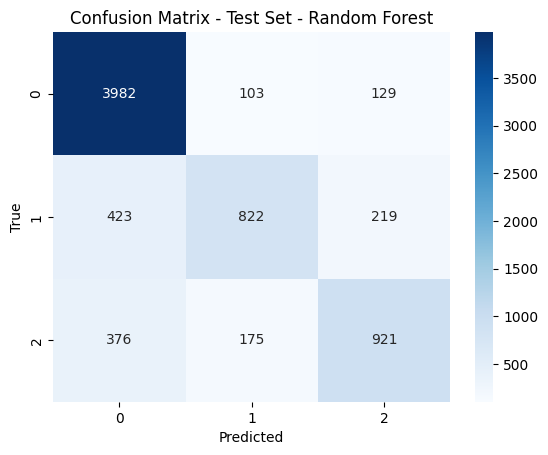

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(scaled_X_vgg_train, y_train)
    y_pred = rf.predict(scaled_X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(scaled_X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(scaled_X_vgg_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(scaled_X_vgg_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 161, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-27 00:09:36,525] A new study created in memory with name: no-name-8249df26-22b3-4cac-9c17-15bfe49d9e5f
[I 2024-06-27 00:09:56,848] Trial 0 finished with value: 0.8127272727272727 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.8127272727272727.
[I 2024-06-27 00:10:02,537] Trial 1 finished with value: 0.8128671328671329 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.8128671328671329.
[I 2024-06-27 00:10:09,525] Trial 2 finished with value: 0.7809790209790209 and parameters: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.8128671328671329.
[I 2024-06-27 00:10:15,799] Trial 3 finished with value: 0.819020979020979 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'minkowski'}. Best is trial 3 with value: 0.819020979020979.
[I 2024-06-27 00:10:21,507] Trial 4 finished with value: 0.8043

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      4202
         1.0       0.72      0.68      0.70      1480
         2.0       0.73      0.69      0.71      1468

    accuracy                           0.82      7150
   macro avg       0.78      0.76      0.77      7150
weighted avg       0.82      0.82      0.82      7150



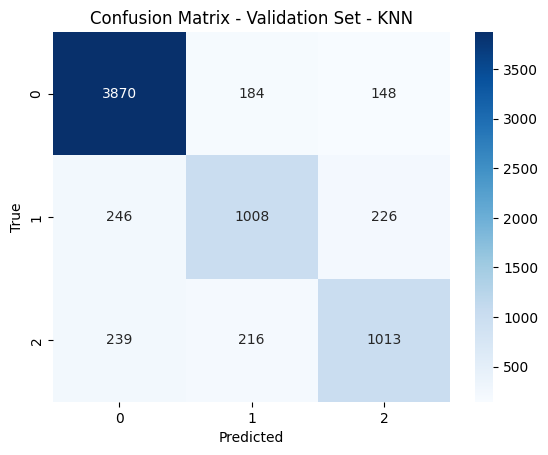

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      4214
         1.0       0.71      0.68      0.69      1464
         2.0       0.72      0.69      0.70      1472

    accuracy                           0.82      7150
   macro avg       0.77      0.76      0.77      7150
weighted avg       0.82      0.82      0.82      7150



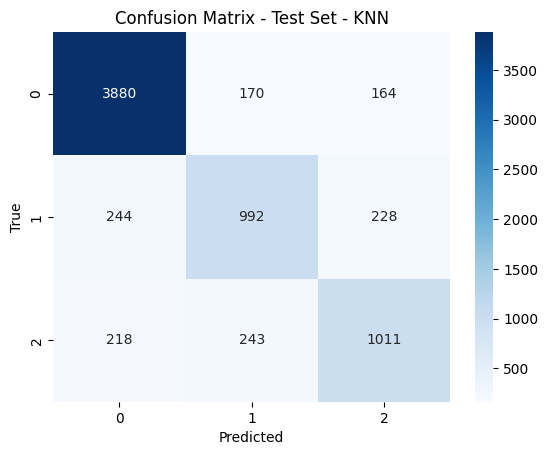

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(scaled_X_vgg_train, y_train)
    y_pred = knn.predict(scaled_X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(scaled_X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(scaled_X_vgg_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(scaled_X_vgg_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'euclidean'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(scaled_X_vgg_train, y_train)
    y_pred = svm.predict(scaled_X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(scaled_X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(scaled_X_vgg_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(scaled_X_vgg_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

NameError: name 'best_svm_params' is not defined

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

[I 2024-06-27 20:39:39,401] A new study created in memory with name: no-name-f2da472f-202e-4f3c-94a5-ee8fce9f9e6d
[I 2024-06-27 20:44:11,146] Trial 0 finished with value: 0.8304895104895105 and parameters: {'n_estimators': 128, 'learning_rate': 0.184552419738096, 'max_depth': 32, 'subsample': 0.7951893136954894, 'colsample_bytree': 0.7347022758491134}. Best is trial 0 with value: 0.8304895104895105.
[I 2024-06-27 20:49:48,024] Trial 1 finished with value: 0.8282517482517483 and parameters: {'n_estimators': 122, 'learning_rate': 0.1296412024008852, 'max_depth': 25, 'subsample': 0.7407582827636313, 'colsample_bytree': 0.7779763866866071}. Best is trial 0 with value: 0.8304895104895105.
[I 2024-06-27 20:55:56,832] Trial 2 finished with value: 0.8240559440559441 and parameters: {'n_estimators': 174, 'learning_rate': 0.04584230021557601, 'max_depth': 12, 'subsample': 0.9210699060372343, 'colsample_bytree': 0.8916463773361256}. Best is trial 0 with value: 0.8304895104895105.
[I 2024-06-27 21

Validation Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      4199
         1.0       0.78      0.66      0.71      1512
         2.0       0.73      0.71      0.72      1439

    accuracy                           0.83      7150
   macro avg       0.80      0.77      0.78      7150
weighted avg       0.83      0.83      0.83      7150



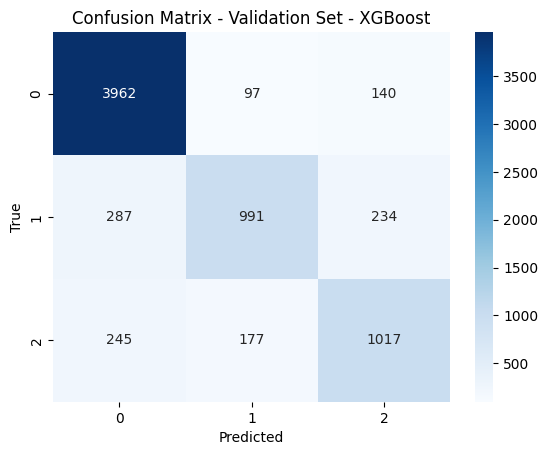

Test Classification Report - XGBoost:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4185
         1.0       0.75      0.67      0.71      1508
         2.0       0.75      0.67      0.71      1457

    accuracy                           0.83      7150
   macro avg       0.79      0.76      0.77      7150
weighted avg       0.82      0.83      0.82      7150



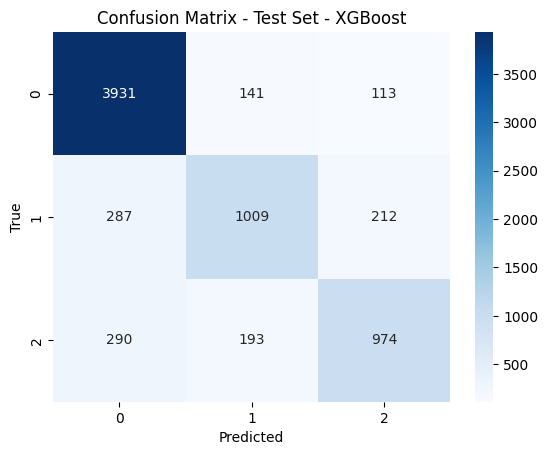

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(scaled_X_vgg_train, y_train)
    y_pred = xgb_clf.predict(scaled_X_vgg_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(scaled_X_vgg_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(scaled_X_vgg_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(scaled_X_vgg_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

{'n_estimators': 177, 'learning_rate': 0.15199208402729694, 'max_depth': 11, 'subsample': 0.9815036286368223, 'colsample_bytree': 0.8024068513136894}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## YAMNet



*   X_yamn_train
*   X_yamn_val
*   X_yamn_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_yamn_train= scaler.fit_transform(X_yamn_train)

# Ajustar y transformar x_test y x_val
scaled_X_yamn_test = scaler.transform(X_yamn_test)
scaled_X_yamn_val = scaler.transform(X_yamn_val)

### Random Forest + Optuna

[I 2024-06-28 01:56:20,605] A new study created in memory with name: no-name-aee1579a-6b90-4ac7-abc2-d87cc5420735
[I 2024-06-28 01:57:13,014] Trial 0 finished with value: 0.6658741258741259 and parameters: {'n_estimators': 92, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6658741258741259.
[I 2024-06-28 01:57:48,395] Trial 1 finished with value: 0.6489510489510489 and parameters: {'n_estimators': 67, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6658741258741259.
[I 2024-06-28 01:58:51,545] Trial 2 finished with value: 0.7648951048951049 and parameters: {'n_estimators': 60, 'max_depth': 24, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.7648951048951049.
[I 2024-06-28 02:01:16,413] Trial 3 finished with value: 0.7608391608391608 and parameters: {'n_estimators': 153, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.7

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      4174
         1.0       0.76      0.49      0.60      1540
         2.0       0.73      0.56      0.63      1436

    accuracy                           0.78      7150
   macro avg       0.76      0.67      0.70      7150
weighted avg       0.77      0.78      0.76      7150



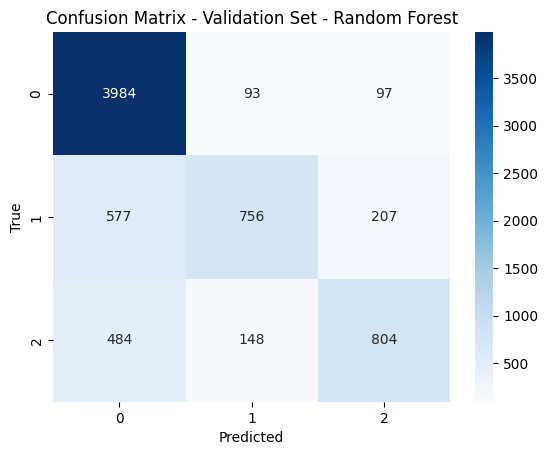

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      4222
         1.0       0.73      0.49      0.59      1494
         2.0       0.71      0.55      0.62      1434

    accuracy                           0.77      7150
   macro avg       0.75      0.66      0.69      7150
weighted avg       0.76      0.77      0.76      7150



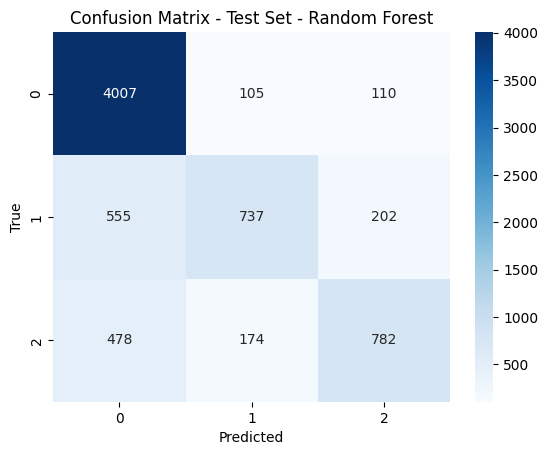

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(scaled_X_yamn_train, y_train)
    y_pred = rf.predict(scaled_X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(scaled_X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(scaled_X_yamn_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(scaled_X_yamn_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 142, 'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-06-28 03:19:42,325] A new study created in memory with name: no-name-0de2b0cf-7cdd-46bd-9543-7d48c9d976d4
[I 2024-06-28 03:31:04,350] Trial 0 finished with value: 0.7886713286713287 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 0 with value: 0.7886713286713287.
[I 2024-06-28 03:31:38,608] Trial 1 finished with value: 0.821958041958042 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.821958041958042.
[I 2024-06-28 03:42:59,611] Trial 2 finished with value: 0.7937062937062938 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.821958041958042.
[I 2024-06-28 03:54:22,133] Trial 3 finished with value: 0.7937062937062938 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.821958041958042.
[I 2024-06-28 04:05:41,358] Trial 4 finished with value: 0.8114685

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      4174
         1.0       0.75      0.67      0.71      1540
         2.0       0.72      0.69      0.70      1436

    accuracy                           0.82      7150
   macro avg       0.78      0.76      0.77      7150
weighted avg       0.82      0.82      0.82      7150



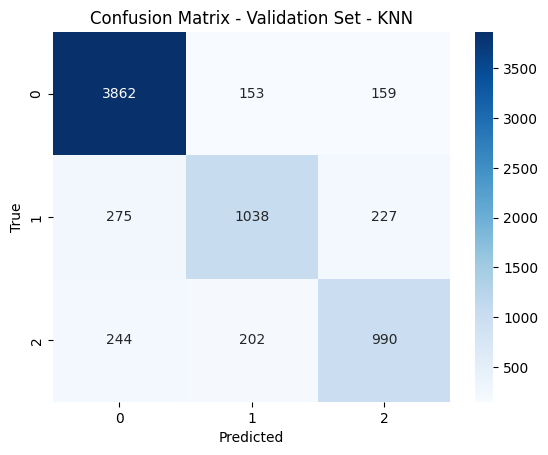

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      4222
         1.0       0.73      0.70      0.72      1494
         2.0       0.74      0.69      0.71      1434

    accuracy                           0.83      7150
   macro avg       0.79      0.77      0.78      7150
weighted avg       0.83      0.83      0.83      7150



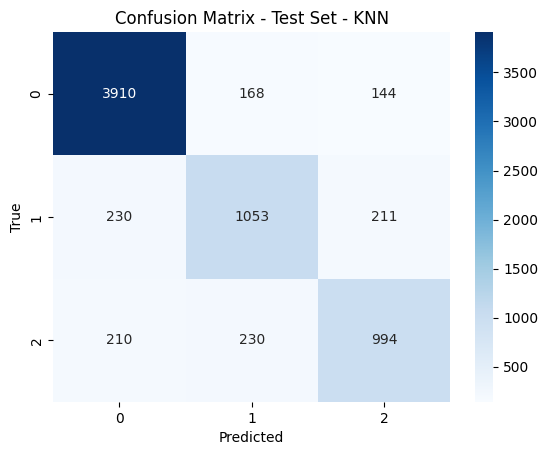

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(scaled_X_yamn_train, y_train)
    y_pred = knn.predict(scaled_X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(scaled_X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(scaled_X_yamn_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(scaled_X_yamn_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'euclidean'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(scaled_X_yamn_train, y_train)
    y_pred = svm.predict(scaled_X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(scaled_X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(scaled_X_yamn_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(scaled_X_yamn_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(scaled_X_yamn_train, y_train)
    y_pred = xgb_clf.predict(scaled_X_yamn_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(scaled_X_yamn_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(scaled_X_yamn_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(scaled_X_yamn_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-28 01:51:07,877] A new study created in memory with name: no-name-6ca17d81-1b5c-4081-94fe-5d63ff5e6117
Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7a8b678766b0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 589, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 
[W 2024-06-28 01:51:18,077] Trial 0 failed with parameters: {'n_estimators': 101, 'learning_rate': 0.13837669929315013, 'max_depth': 29, 'subsample': 0.8405714164133684, 'colsample_bytree': 0.7729336595192603} because of the following error: XGBoostError('[01:51:18] /workspace/src/common/quantile.h:770: Check failed: count <= total_entries (57197 vs. 0) : \nStack trace:\n  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x1fd7ba) [0x7a8b67aaa7ba]\n  [bt] (1) /usr

XGBoostError: [01:51:18] /workspace/src/common/quantile.h:770: Check failed: count <= total_entries (57197 vs. 0) : 
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x1fd7ba) [0x7a8b67aaa7ba]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x21e6e7) [0x7a8b67acb6e7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x21edcf) [0x7a8b67acbdcf]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f65f1) [0x7a8b67ca35f1]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3f8858) [0x7a8b67ca5858]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3a2a07) [0x7a8b67c4fa07]
  [bt] (6) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGQuantileDMatrixCreateFromCallback+0x2b0) [0x7a8b67a12c40]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7a8d5bf0be2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7a8d5bf08493]



In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

## PANNs



*   X_panns_train
*   X_panns_val
*   X_panns_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_panns_train= scaler.fit_transform(X_panns_train)

# Ajustar y transformar x_test y x_val
scaled_X_panns_test = scaler.transform(X_panns_test)
scaled_X_panns_val = scaler.transform(X_panns_val)

### Random Forest + Optuna

[I 2024-07-01 21:36:38,778] A new study created in memory with name: no-name-3edae85b-97b3-4dd7-a4e4-6176c76c975b
[I 2024-07-01 21:38:06,742] Trial 0 finished with value: 0.7440559440559441 and parameters: {'n_estimators': 127, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.7440559440559441.
[I 2024-07-01 21:38:16,645] Trial 1 finished with value: 0.7124475524475524 and parameters: {'n_estimators': 17, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7440559440559441.
[I 2024-07-01 21:38:41,186] Trial 2 finished with value: 0.6447552447552447 and parameters: {'n_estimators': 72, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7440559440559441.
[I 2024-07-01 21:39:18,432] Trial 3 finished with value: 0.7934265734265734 and parameters: {'n_estimators': 43, 'max_depth': 26, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.7

Validation Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      4158
         1.0       0.84      0.63      0.72      1518
         2.0       0.80      0.65      0.72      1474

    accuracy                           0.83      7150
   macro avg       0.83      0.75      0.78      7150
weighted avg       0.83      0.83      0.82      7150



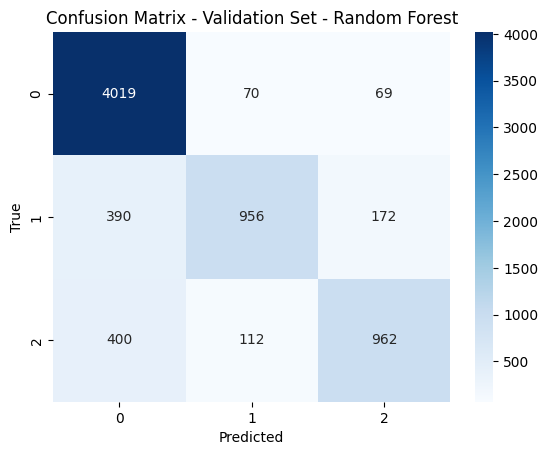

Test Classification Report - Random Forest:
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4196
         1.0       0.82      0.63      0.71      1475
         2.0       0.82      0.67      0.74      1479

    accuracy                           0.83      7150
   macro avg       0.83      0.75      0.78      7150
weighted avg       0.83      0.83      0.82      7150



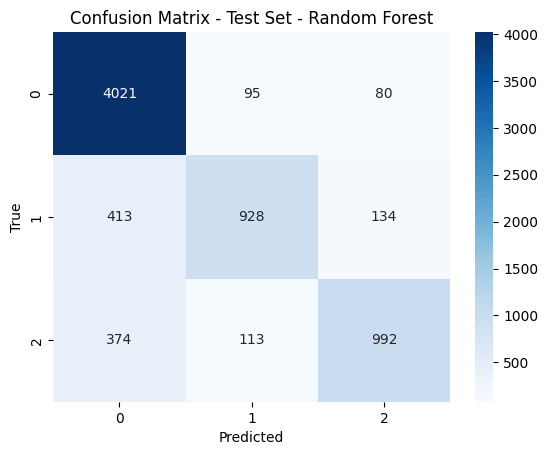

In [ ]:
# Definir la función de objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                random_state=42,)
    rf.fit(scaled_X_panns_train, y_train)
    y_pred = rf.predict(scaled_X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50)

# Mejor modelo
best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(scaled_X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val = best_rf.predict(scaled_X_panns_val)
print("Validation Classification Report - Random Forest:")
print(classification_report(y_val, y_pred_val))

# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test = best_rf.predict(scaled_X_panns_test)
print("Test Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_rf_params)
optuna.visualization.plot_optimization_history(study_rf)

{'n_estimators': 109, 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 1}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_rf)

In [ ]:
optuna.visualization.plot_param_importances(study_rf)

### K-nn + Optuna

[I 2024-07-02 12:48:27,151] A new study created in memory with name: no-name-8cb7482a-407c-4468-b7da-13a3ab51cec0
[I 2024-07-02 12:50:00,130] Trial 0 finished with value: 0.908951048951049 and parameters: {'n_neighbors': 1, 'weights': 'uniform', 'metric': 'minkowski'}. Best is trial 0 with value: 0.908951048951049.
[I 2024-07-02 13:06:25,890] Trial 1 finished with value: 0.9095104895104895 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.9095104895104895.
[I 2024-07-02 13:22:42,814] Trial 2 finished with value: 0.8823776223776224 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.9095104895104895.
[I 2024-07-02 13:23:54,275] Trial 3 finished with value: 0.8896503496503496 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.9095104895104895.
[I 2024-07-02 13:25:03,336] Trial 4 finished with value: 0.8931

Validation Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4220
         1.0       0.88      0.83      0.86      1521
         2.0       0.86      0.86      0.86      1409

    accuracy                           0.92      7150
   macro avg       0.90      0.89      0.89      7150
weighted avg       0.91      0.92      0.91      7150



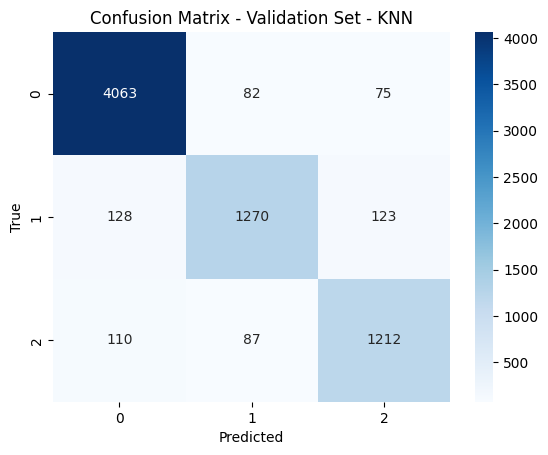

Test Classification Report - KNN:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      4169
         1.0       0.86      0.84      0.85      1483
         2.0       0.89      0.84      0.86      1498

    accuracy                           0.91      7150
   macro avg       0.89      0.88      0.89      7150
weighted avg       0.91      0.91      0.91      7150



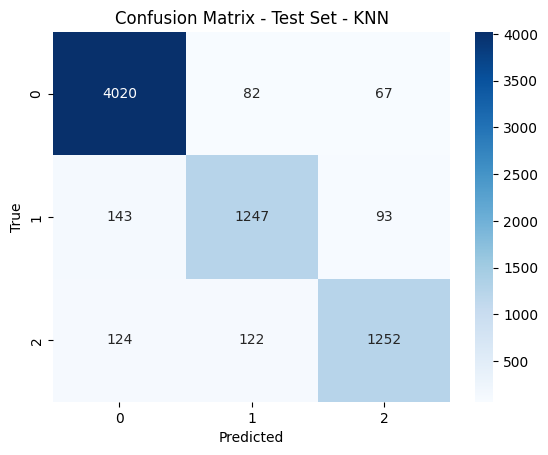

In [ ]:
# Definir la función de objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    knn.fit(scaled_X_panns_train, y_train)
    y_pred = knn.predict(scaled_X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

# Mejor modelo
best_knn_params = study_knn.best_params
best_knn = KNeighborsClassifier(**best_knn_params)
best_knn.fit(scaled_X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_knn = best_knn.predict(scaled_X_panns_val)
print("Validation Classification Report - KNN:")
print(classification_report(y_val, y_pred_val_knn))

# Matriz de confusión
conf_matrix_knn = confusion_matrix(y_val, y_pred_val_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_knn = best_knn.predict(scaled_X_panns_test)
print("Test Classification Report - KNN:")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
conf_matrix_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(conf_matrix_test_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

print(best_knn_params)
optuna.visualization.plot_optimization_history(study_knn)

{'n_neighbors': 4, 'weights': 'distance', 'metric': 'euclidean'}


In [ ]:
optuna.visualization.plot_parallel_coordinate(study_knn)

In [ ]:
optuna.visualization.plot_param_importances(study_knn)

### SVM + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_svm(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    svm = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )
    svm.fit(scaled_X_panns_train, y_train)
    y_pred = svm.predict(scaled_X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50)

# Mejor modelo
best_svm_params = study_svm.best_params
best_svm = SVC(**best_svm_params)
best_svm.fit(scaled_X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_svm = best_svm.predict(scaled_X_panns_val)
print("Validation Classification Report - SVM:")
print(classification_report(y_val, y_pred_val_svm))

# Matriz de confusión
conf_matrix_svm = confusion_matrix(y_val, y_pred_val_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_svm = best_svm.predict(scaled_X_panns_test)
print("Test Classification Report - SVM:")
print(classification_report(y_test, y_pred_test_svm))

# Matriz de confusión
conf_matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(conf_matrix_test_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[I 2024-06-14 23:15:43,383] A new study created in memory with name: no-name-d6686195-5125-4401-b32c-d749352d5a3f


In [ ]:
import matplotlib.pyplot as plt

print(best_svm_params)
optuna.visualization.plot_optimization_history(study_svm)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_svm)

In [ ]:
optuna.visualization.plot_param_importances(study_svm)

### XGBoost + Optuna

In [ ]:
# Definir la función de objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    subsample = trial.suggest_float('subsample', 0.7, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.7, 1.0)

    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                max_depth=max_depth, subsample=subsample,
                                colsample_bytree=colsample_bytree)
    xgb_clf.fit(scaled_X_panns_train, y_train)
    y_pred = xgb_clf.predict(scaled_X_panns_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Crear el estudio y optimizar
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Mejor modelo
best_xgb_params = study_xgb.best_params
best_xgb = xgb.XGBClassifier(**best_xgb_params)
best_xgb.fit(scaled_X_panns_train, y_train)

# Evaluación en conjunto de validación
y_pred_val_xgb = best_xgb.predict(scaled_X_panns_val)
print("Validation Classification Report - XGBoost:")
print(classification_report(y_val, y_pred_val_xgb))

# Matriz de confusión
conf_matrix_xgb = confusion_matrix(y_val, y_pred_val_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluación en conjunto de prueba
y_pred_test_xgb = best_xgb.predict(scaled_X_panns_test)
print("Test Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_test_xgb))

# Matriz de confusión
conf_matrix_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(conf_matrix_test_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

NameError: name 'optuna' is not defined

In [ ]:
import matplotlib.pyplot as plt

print(best_xgb_params)
optuna.visualization.plot_optimization_history(study_xgb)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study_xgb)

In [ ]:
optuna.visualization.plot_param_importances(study_xgb)

# Perceptrón multicapa

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00


## Indices acústicos (_ai)


*   X_ai_train
*   X_ai_val
*   X_ai_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_Xai= scaler.fit_transform(X_ai_train)

# Ajustar y transformar x_test y x_val
scaled_x_test = scaler.transform(X_ai_test)
scaled_x_val = scaler.transform(X_ai_val)

[I 2024-07-02 19:17:10,747] A new study created in memory with name: no-name-3f9386cd-41f4-4874-873c-7c97b046e12f
[I 2024-07-02 19:17:51,735] Trial 0 finished with value: 0.6895104895104895 and parameters: {'hidden_layers': 3, 'hidden_units_0': 103, 'hidden_units_1': 183, 'hidden_units_2': 68}. Best is trial 0 with value: 0.6895104895104895.
[I 2024-07-02 19:18:05,966] Trial 1 finished with value: 0.6822377622377622 and parameters: {'hidden_layers': 2, 'hidden_units_0': 117, 'hidden_units_1': 229}. Best is trial 0 with value: 0.6895104895104895.
[I 2024-07-02 19:18:24,208] Trial 2 finished with value: 0.6911888111888111 and parameters: {'hidden_layers': 3, 'hidden_units_0': 116, 'hidden_units_1': 251, 'hidden_units_2': 71}. Best is trial 2 with value: 0.6911888111888111.
[I 2024-07-02 19:18:34,537] Trial 3 finished with value: 0.6544055944055944 and parameters: {'hidden_layers': 1, 'hidden_units_0': 221}. Best is trial 2 with value: 0.6911888111888111.
[I 2024-07-02 19:18:44,112] Trial

Number of finished trials:  50
Best trial:
  Value:  0.7026573426573427
  Params: 
    hidden_layers: 3
    hidden_units_0: 253
    hidden_units_1: 214
    hidden_units_2: 246
Validation Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.58      0.66      0.62      4227
           1       0.20      0.17      0.18      1505
           2       0.18      0.15      0.16      1418

    accuracy                           0.45      7150
   macro avg       0.32      0.32      0.32      7150
weighted avg       0.42      0.45      0.44      7150



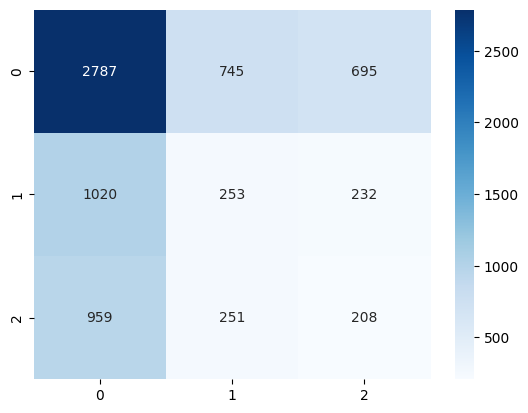

Test Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4190
           1       0.50      0.45      0.47      1526
           2       0.57      0.46      0.51      1434

    accuracy                           0.70      7150
   macro avg       0.62      0.59      0.60      7150
weighted avg       0.68      0.70      0.69      7150



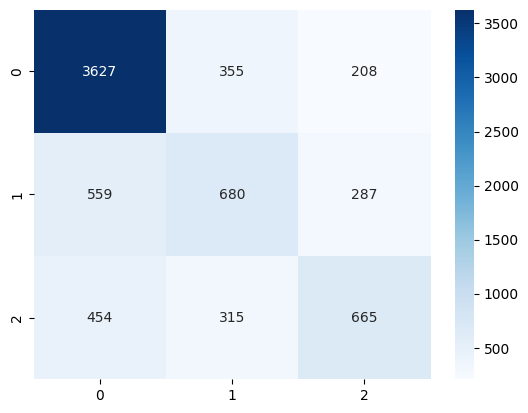

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a tensores y asegurar que y_train, y_val y y_test sean 1D
scaled_Xai = torch.tensor(scaled_Xai, dtype=torch.float32)
y_train = torch.tensor(y_train.squeeze(), dtype=torch.long)
scaled_x_val = torch.tensor(scaled_x_val, dtype=torch.float32)
y_val = torch.tensor(y_val.squeeze(), dtype=torch.long)
scaled_x_test = torch.tensor(scaled_x_test, dtype=torch.float32)
y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

# Crear datasets y dataloaders
train_dataset = TensorDataset(scaled_Xai, y_train)
val_dataset = TensorDataset(scaled_x_val, y_val)
test_dataset = TensorDataset(scaled_x_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_units_list, output_size):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size

        for hidden_units in hidden_units_list:
            layers.append(nn.Linear(in_features, hidden_units))
            layers.append(nn.ReLU())
            in_features = hidden_units

        layers.append(nn.Linear(in_features, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def objective(trial):
    hidden_layers = trial.suggest_int('hidden_layers', 1, 3)
    hidden_units_list = [trial.suggest_int(f'hidden_units_{i}', 32, 256) for i in range(hidden_layers)]

    input_size = scaled_Xai.shape[1]
    output_size = len(torch.unique(y_train))  # Número de clases en y_train
    model = MLP(input_size, hidden_units_list, output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

def evaluate_model(model, dataloader, y_true):
    model.eval()
    y_pred = []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
    y_pred = np.array(y_pred)
    print(classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    # Entrenar el mejor modelo en el conjunto de entrenamiento completo
    best_hidden_units_list = [trial.params[f'hidden_units_{i}'] for i in range(trial.params['hidden_layers'])]
    best_model = MLP(scaled_Xai.shape[1], best_hidden_units_list, len(torch.unique(y_train))).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(best_model.parameters(), lr=0.001)

    best_model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = best_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluación en conjunto de validación
    print("Validation Classification Report - MLP:")
    evaluate_model(best_model, valloader, y_val)

    # Evaluación en conjunto de prueba
    print("Test Classification Report - MLP:")
    evaluate_model(best_model, testloader, y_test)


In [ ]:
import matplotlib.pyplot as plt
best_params = study.best_params

optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## VGGish


*   X_vgg_train
*   X_vgg_val
*   X_vgg_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_vgg_train= scaler.fit_transform(X_vgg_train)

# Ajustar y transformar x_test y x_val
scaled_X_vgg_test = scaler.transform(X_vgg_test)
scaled_X_vgg_val = scaler.transform(X_vgg_val)

<ipython-input-33-75c15631e412>:13: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-33-75c15631e412>:15: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-33-75c15631e412>:17: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

[I 2024-07-02 20:29:31,355] A new study created in memory with name: no-name-29d5a1ea-cc4a-43e0-a638-3e36483f7d73
[I 2024-07-02 20:29:41,880] Trial 0 finished with value: 0.6914685314685315 and parameters: {'hidden_layers': 1, 'hidden_units_0': 90}. Best is trial 0 with value: 0.6914685314685315.


Number of finished trials:  50
Best trial:
  Value:  0.7302097902097902
  Params: 
    hidden_layers: 2
    hidden_units_0: 178
    hidden_units_1: 239
Validation Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      4227
           1       0.20      0.11      0.14      1505
           2       0.21      0.23      0.22      1418

    accuracy                           0.46      7150
   macro avg       0.33      0.34      0.33      7150
weighted avg       0.43      0.46      0.44      7150



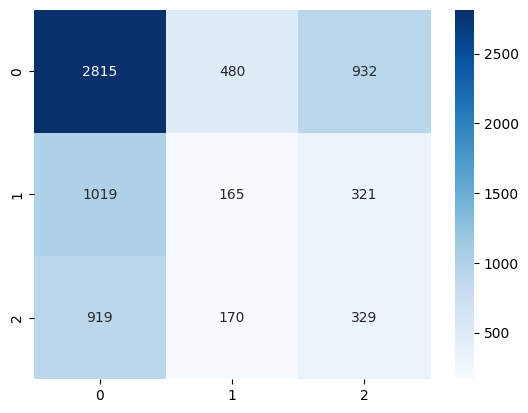

Test Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4190
           1       0.59      0.33      0.42      1526
           2       0.53      0.57      0.55      1434

    accuracy                           0.72      7150
   macro avg       0.64      0.60      0.61      7150
weighted avg       0.70      0.72      0.70      7150



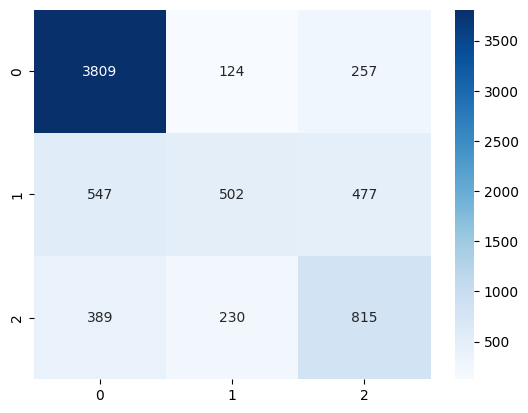

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a tensores y asegurar que y_train, y_val y y_test sean 1D
scaled_X_vgg_train = torch.tensor(scaled_X_vgg_train, dtype=torch.float32)
y_train = torch.tensor(y_train.squeeze(), dtype=torch.long)
scaled_X_vgg_val = torch.tensor(scaled_X_vgg_val, dtype=torch.float32)
y_val = torch.tensor(y_val.squeeze(), dtype=torch.long)
scaled_X_vgg_test = torch.tensor(scaled_X_vgg_test, dtype=torch.float32)
y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

# Crear datasets y dataloaders
train_dataset = TensorDataset(scaled_X_vgg_train, y_train)
val_dataset = TensorDataset(scaled_X_vgg_val, y_val)
test_dataset = TensorDataset(scaled_X_vgg_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_units_list, output_size):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size

        for hidden_units in hidden_units_list:
            layers.append(nn.Linear(in_features, hidden_units))
            layers.append(nn.ReLU())
            in_features = hidden_units

        layers.append(nn.Linear(in_features, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def objective(trial):
    hidden_layers = trial.suggest_int('hidden_layers', 1, 3)
    hidden_units_list = [trial.suggest_int(f'hidden_units_{i}', 32, 256) for i in range(hidden_layers)]

    input_size = scaled_X_vgg_train.shape[1]
    output_size = len(torch.unique(y_train))  # Número de clases en y_train
    model = MLP(input_size, hidden_units_list, output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

def evaluate_model(model, dataloader, y_true):
    model.eval()
    y_pred = []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
    y_pred = np.array(y_pred)
    print(classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    # Entrenar el mejor modelo en el conjunto de entrenamiento completo
    best_hidden_units_list = [trial.params[f'hidden_units_{i}'] for i in range(trial.params['hidden_layers'])]
    best_model = MLP(scaled_X_vgg_train.shape[1], best_hidden_units_list, len(torch.unique(y_train))).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(best_model.parameters(), lr=0.001)

    best_model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = best_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluación en conjunto de validación
    print("Validation Classification Report - MLP:")
    evaluate_model(best_model, valloader, y_val)

    # Evaluación en conjunto de prueba
    print("Test Classification Report - MLP:")
    evaluate_model(best_model, testloader, y_test)


In [ ]:
import matplotlib.pyplot as plt
best_params = study.best_params

optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## YAMNet

*   X_yamn_train
*   X_yamn_val
*   X_yamn_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_yamn_train= scaler.fit_transform(X_yamn_train)

# Ajustar y transformar x_test y x_val
scaled_X_yamn_test = scaler.transform(X_yamn_test)
scaled_X_yamn_val = scaler.transform(X_yamn_val)

<ipython-input-45-de382bdb5241>:12: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-45-de382bdb5241>:13: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-45-de382bdb5241>:15: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-45-de382bdb5241>:16: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-45-de382bdb5241>:17: UserWarning:

To copy constr

Number of finished trials:  50
Best trial:
  Value:  0.7879720279720279
  Params: 
    hidden_layers: 3
    hidden_units_0: 136
    hidden_units_1: 130
    hidden_units_2: 209
Validation Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63      4227
           1       0.23      0.13      0.17      1505
           2       0.19      0.19      0.19      1418

    accuracy                           0.46      7150
   macro avg       0.34      0.33      0.33      7150
weighted avg       0.43      0.46      0.44      7150



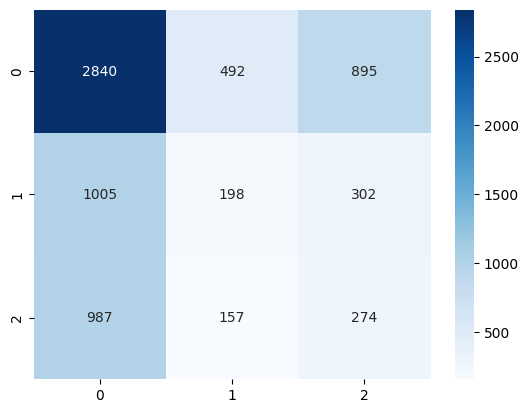

Test Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      4190
           1       0.75      0.42      0.54      1526
           2       0.61      0.63      0.62      1434

    accuracy                           0.77      7150
   macro avg       0.73      0.66      0.68      7150
weighted avg       0.76      0.77      0.75      7150



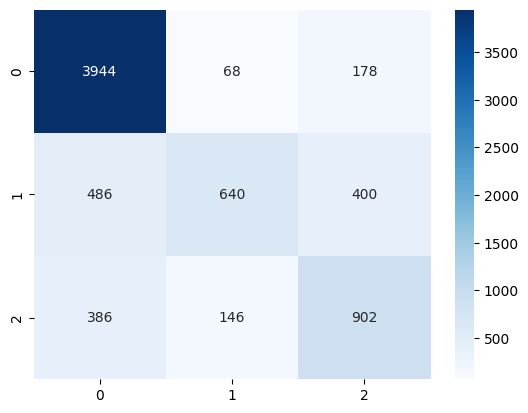

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a tensores y asegurar que y_train, y_val y y_test sean 1D
scaled_X_yamn_train = torch.tensor(scaled_X_yamn_train, dtype=torch.float32)
y_train = torch.tensor(y_train.squeeze(), dtype=torch.long)
scaled_X_yamn_val = torch.tensor(scaled_X_yamn_val, dtype=torch.float32)
y_val = torch.tensor(y_val.squeeze(), dtype=torch.long)
scaled_X_yamn_test = torch.tensor(scaled_X_yamn_test, dtype=torch.float32)
y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

# Crear datasets y dataloaders
train_dataset = TensorDataset(scaled_X_yamn_train, y_train)
val_dataset = TensorDataset(scaled_X_yamn_val, y_val)
test_dataset = TensorDataset(scaled_X_yamn_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_units_list, output_size):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size

        for hidden_units in hidden_units_list:
            layers.append(nn.Linear(in_features, hidden_units))
            layers.append(nn.ReLU())
            in_features = hidden_units

        layers.append(nn.Linear(in_features, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def objective(trial):
    hidden_layers = trial.suggest_int('hidden_layers', 1, 3)
    hidden_units_list = [trial.suggest_int(f'hidden_units_{i}', 32, 256) for i in range(hidden_layers)]

    input_size = scaled_X_yamn_train.shape[1]
    output_size = len(torch.unique(y_train))  # Número de clases en y_train
    model = MLP(input_size, hidden_units_list, output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

def evaluate_model(model, dataloader, y_true):
    model.eval()
    y_pred = []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
    y_pred = np.array(y_pred)
    print(classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    # Entrenar el mejor modelo en el conjunto de entrenamiento completo
    best_hidden_units_list = [trial.params[f'hidden_units_{i}'] for i in range(trial.params['hidden_layers'])]
    best_model = MLP(scaled_X_yamn_train.shape[1], best_hidden_units_list, len(torch.unique(y_train))).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(best_model.parameters(), lr=0.001)

    best_model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = best_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluación en conjunto de validación
    print("Validation Classification Report - MLP:")
    evaluate_model(best_model, valloader, y_val)

    # Evaluación en conjunto de prueba
    print("Test Classification Report - MLP:")
    evaluate_model(best_model, testloader, y_test)

In [ ]:
import matplotlib.pyplot as plt
best_params = study.best_params

optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## PANNs



*   X_panns_train
*   X_panns_val
*   X_panns_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

scaled_X_panns_train= scaler.fit_transform(X_panns_train)

# Ajustar y transformar x_test y x_val
scaled_X_panns_test = scaler.transform(X_panns_test)
scaled_X_panns_val = scaler.transform(X_panns_val)

<ipython-input-50-aab61d3473dd>:13: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-50-aab61d3473dd>:15: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-50-aab61d3473dd>:17: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

[I 2024-07-02 22:10:38,313] A new study created in memory with name: no-name-110a9776-31f9-43d8-ac76-8808ccb16be9
[I 2024-07-02 22:11:32,843] Trial 0 finished with value: 0.8355244755244755 and parameters: {'hidden_layers': 1, 'hidden_units_0': 167}. Best is trial 0 with value: 0.8355244755244755.

Number of finished trials:  50
Best trial:
  Value:  0.8721678321678321
  Params: 
    hidden_layers: 3
    hidden_units_0: 197
    hidden_units_1: 142
    hidden_units_2: 184
Validation Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      4227
           1       0.21      0.21      0.21      1505
           2       0.19      0.20      0.20      1418

    accuracy                           0.43      7150
   macro avg       0.33      0.33      0.33      7150
weighted avg       0.43      0.43      0.43      7150



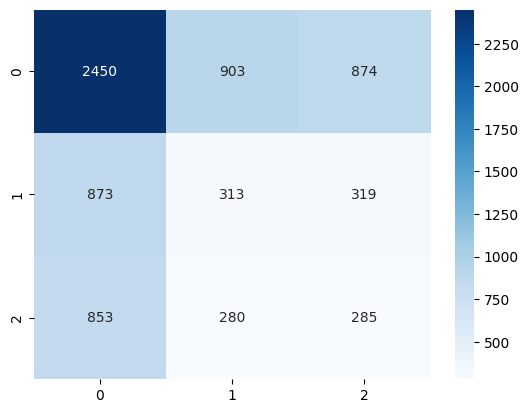

Test Classification Report - MLP:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4190
           1       0.78      0.77      0.77      1526
           2       0.75      0.80      0.78      1434

    accuracy                           0.86      7150
   macro avg       0.82      0.83      0.82      7150
weighted avg       0.86      0.86      0.86      7150



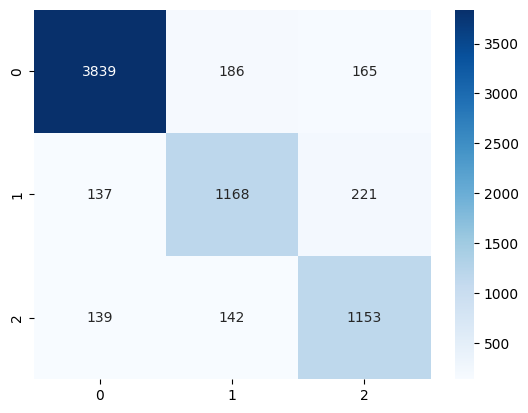

In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los datos a tensores y asegurar que y_train, y_val y y_test sean 1D
scaled_X_panns_train = torch.tensor(scaled_X_panns_train, dtype=torch.float32)
y_train = torch.tensor(y_train.squeeze(), dtype=torch.long)
scaled_X_panns_val = torch.tensor(scaled_X_panns_val, dtype=torch.float32)
y_val = torch.tensor(y_val.squeeze(), dtype=torch.long)
scaled_X_panns_test = torch.tensor(scaled_X_panns_test, dtype=torch.float32)
y_test = torch.tensor(y_test.squeeze(), dtype=torch.long)

# Crear datasets y dataloaders
train_dataset = TensorDataset(scaled_X_panns_train, y_train)
val_dataset = TensorDataset(scaled_X_panns_val, y_val)
test_dataset = TensorDataset(scaled_X_panns_test, y_test)

trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_units_list, output_size):
        super(MLP, self).__init__()
        layers = []
        in_features = input_size

        for hidden_units in hidden_units_list:
            layers.append(nn.Linear(in_features, hidden_units))
            layers.append(nn.ReLU())
            in_features = hidden_units

        layers.append(nn.Linear(in_features, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def objective(trial):
    hidden_layers = trial.suggest_int('hidden_layers', 1, 3)
    hidden_units_list = [trial.suggest_int(f'hidden_units_{i}', 32, 256) for i in range(hidden_layers)]

    input_size = scaled_X_panns_train.shape[1]
    output_size = len(torch.unique(y_train))  # Número de clases en y_train
    model = MLP(input_size, hidden_units_list, output_size).to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

def evaluate_model(model, dataloader, y_true):
    model.eval()
    y_pred = []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy())
    y_pred = np.array(y_pred)
    print(classification_report(y_true, y_pred))
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()

if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    # Entrenar el mejor modelo en el conjunto de entrenamiento completo
    best_hidden_units_list = [trial.params[f'hidden_units_{i}'] for i in range(trial.params['hidden_layers'])]
    best_model = MLP(scaled_X_panns_train.shape[1], best_hidden_units_list, len(torch.unique(y_train))).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(best_model.parameters(), lr=0.001)

    best_model.train()
    for epoch in range(5):
        for data in trainloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = best_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluación en conjunto de validación
    print("Validation Classification Report - MLP:")
    evaluate_model(best_model, valloader, y_val)

    # Evaluación en conjunto de prueba
    print("Test Classification Report - MLP:")
    evaluate_model(best_model, testloader, y_test)


In [ ]:
import matplotlib.pyplot as plt
best_params = study.best_params

optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

# Prueba 1, no termina de ejecutar

In [ ]:
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

# Asegúrate de que y_train, y_val y y_test sean vectores 1D
y_train = y_train.ravel()
y_val = y_val.ravel()
y_test = y_test.ravel()

datasets = {
    'Acoustic Indices': (X_ai_train, y_train),
    'VGGish': (X_vgg_train, y_train),
    'YAMNet': (X_yamn_train, y_train),
    'PANNs': (X_panns_train, y_train)
}

### **Random Forest + Optuna**

In [ ]:
def objective_rf(trial, X_train, y_train):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

[I 2024-06-14 00:02:01,494] A new study created in memory with name: no-name-b6ce5e22-4e49-4b8f-b366-59a64d521215
[I 2024-06-14 00:04:30,307] Trial 0 finished with value: 0.8004266112679366 and parameters: {'n_estimators': 132, 'max_depth': 25, 'min_samples_split': 5}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:04:49,085] Trial 1 finished with value: 0.6306100249241648 and parameters: {'n_estimators': 51, 'max_depth': 5, 'min_samples_split': 15}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:06:14,101] Trial 2 finished with value: 0.7347938105450768 and parameters: {'n_estimators': 117, 'max_depth': 11, 'min_samples_split': 9}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:07:06,002] Trial 3 finished with value: 0.661922829442051 and parameters: {'n_estimators': 96, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 0 with value: 0.8004266112679366.
[I 2024-06-14 00:09:58,264] Trial 4 finished with value: 0.784674043547452

### **K-nn + Optuna**

In [ ]:
def objective_knn(trial, X_train, y_train):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])

    clf = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

### **SVM + Optuna**

In [ ]:
def objective_svm(trial, X_train, y_train):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    clf = SVC(
        C=C,
        kernel=kernel,
        gamma='auto'
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

### **XGBoost + Optuna**

In [ ]:
def objective_xgb(trial, X_train, y_train):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

    clf = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

## Optimizar y Obtener los Mejores Parámetros

In [ ]:
def optimize_and_train(dataset_name, X_train, y_train):
    print(f"Optimizing {dataset_name}...")

    study_rf = optuna.create_study(direction='maximize')
    study_rf.optimize(lambda trial: objective_rf(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for Random Forest ({dataset_name}): {study_rf.best_params}')

    study_knn = optuna.create_study(direction='maximize')
    study_knn.optimize(lambda trial: objective_knn(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for K-NN ({dataset_name}): {study_knn.best_params}')

    study_svm = optuna.create_study(direction='maximize')
    study_svm.optimize(lambda trial: objective_svm(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for SVM ({dataset_name}): {study_svm.best_params}')

    study_xgb = optuna.create_study(direction='minimize')
    study_xgb.optimize(lambda trial: objective_xgb(trial, X_train, y_train), n_trials=50)
    print(f'Best parameters for XGBoost ({dataset_name}): {study_xgb.best_params}')

    # Entrenar los modelos con los mejores parámetros
    best_rf = RandomForestClassifier(**study_rf.best_params)
    best_rf.fit(X_train, y_train)

    best_knn = KNeighborsClassifier(**study_knn.best_params)
    best_knn.fit(X_train, y_train)

    best_svm = SVC(**study_svm.best_params)
    best_svm.fit(X_train, y_train)

    best_xgb = xgb.XGBClassifier(**study_xgb.best_params)
    best_xgb.fit(X_train, y_train)

    return {
        'Random Forest': best_rf,
        'K-NN': best_knn,
        'SVM': best_svm,
        'XGBoost': best_xgb
    }

# Optimizar y entrenar modelos para cada conjunto de datos
models = {}
for dataset_name, (X_train, y_train) in datasets.items():
    models[dataset_name] = optimize_and_train(dataset_name, X_train, y_train)


## **Evaluar y Graficar los Resultados**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_models(models, X_val, y_val):
    for model_name, model in models.items():
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        print(f'Accuracy for {model_name}: {accuracy}')
        cm = confusion_matrix(y_val, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

# Evaluar los modelos en el conjunto de validación
for dataset_name, (X_val, y_val) in {
    'Acoustic Indices': (X_ai_val, y_val),
    'VGGish': (X_vgg_val, y_val),
    'YAMNet': (X_yamn_val, y_val),
    'PANNs': (X_panns_val, y_val)
}.items():
    print(f"Evaluating models for {dataset_name}...")
    evaluate_models(models[dataset_name], X_val, y_val)